### Sie werden beauftragt die portugisische BildungsminsterIn dahingehend zu beraten, wie man die schulische Ausbildung erfolgreicher gestalten könnte. 
Was antworten Sie?
    > qualitative Antwort in verständlicher Sprache, 
    > Konsument der Antwort ist der Duchschnittsbürger

Erstellen Sie außerdem einen fundierten Bericht, welcher Ihre qualitative Antwort mit quantitativen Angaben und aussagekräftigen Abbildungen stützt. 
    > Konsument ist ein Data-Scientist

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("student-mat.csv",sep=";")

print(df.dtypes)
df.head()

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [4]:
revMerkmale = ["address","reason","traveltime","studytime","failures","schoolsup","famsup","paid","activities","nursery","higher","internet","freetime","goout","Dalc","Walc","health","absences","G3"]

ohneG3 = ["address","reason","traveltime","studytime","failures","schoolsup","famsup","paid","activities","nursery","higher","internet","freetime","goout","Dalc","Walc","health"]

## P-Wert
### <0,05 ist statistisch signifikant
### >0,95 Gegenhypothese statistisch signifikant

## Corr-Coefizient
### >0 Wert 1 steigt, Wert 2 steigt
### <0 Wert 1 sinkt, Wert 2 sinkt

In [5]:
def chisquare(var, dep_var, df_name = df):
    contingencyTable = pd.crosstab(df_name[var], df_name[dep_var])
    chi2, pval, dof, expectedFreq = chi2_contingency(contingencyTable)

    #show pval in non-scienetific expression
    print("testvar:",var,"\nchi2=",chi2,"\npval=",f'{pval}',"\ndof=",dof)

    return contingencyTable

In [6]:
chisquare("G3","schoolsup")

testvar: G3 
chi2= 32.517476980364414 
pval= 0.01296725094218429 
dof= 17


schoolsup,no,yes
G3,,
0,37,1
4,1,0
5,5,2
6,9,6
7,7,2
8,26,6
9,22,6
10,46,10
11,38,9


In [7]:
def rp_chisquare(var, dep_var, df_name = df):
    contingencyTable = pd.crosstab(df_name[var], df_name[dep_var])
    chi2, pval, dof, expectedFreq = chi2_contingency(contingencyTable)

    #show pval in non-scienetific expression
    return [round(chi2,5) , round(pval,5)]

In [8]:
rp_chisquare("reason","G3")

[51.44837, 0.45609]

In [9]:
corr_df = pd.DataFrame(columns=["Chi2","P"])
for col in ohneG3:
    corr_df.loc[col] = rp_chisquare(col, "G3")

corr_df

,Chi2,P
address,26.37573,0.06788
reason,51.44837,0.45609
traveltime,32.82571,0.97750
studytime,59.43163,0.19544
failures,132.33841,0.00000
schoolsup,32.51748,0.01297
famsup,13.69188,0.68878
paid,29.77248,0.02803
activities,15.47636,0.56121
nursery,16.07837,0.51829


In [10]:
corr_df.loc[(corr_df.P>0.95)|(corr_df.P<0.05)]

,Chi2,P
traveltime,32.82571,0.97750
failures,132.33841,0.00000
schoolsup,32.51748,0.01297
paid,29.77248,0.02803


In [11]:
# y: Noten, X Kategorien

# Noten per traveltime category - Boxplot
# failures - Barplot
# schoolsup - Barplot
# paid - Barplot
# absence - scatterplot

In [12]:
# Traveltime Values
temp1_df = df.loc[df.traveltime == 1]
temp2_df = df.loc[df.traveltime == 2]
temp3_df = df.loc[df.traveltime == 3]
temp4_df = df.loc[df.traveltime == 4]

values1 = list(temp1_df.G3)
values2 = list(temp2_df.G3)
values3 = list(temp3_df.G3)
values4 = list(temp4_df.G3)

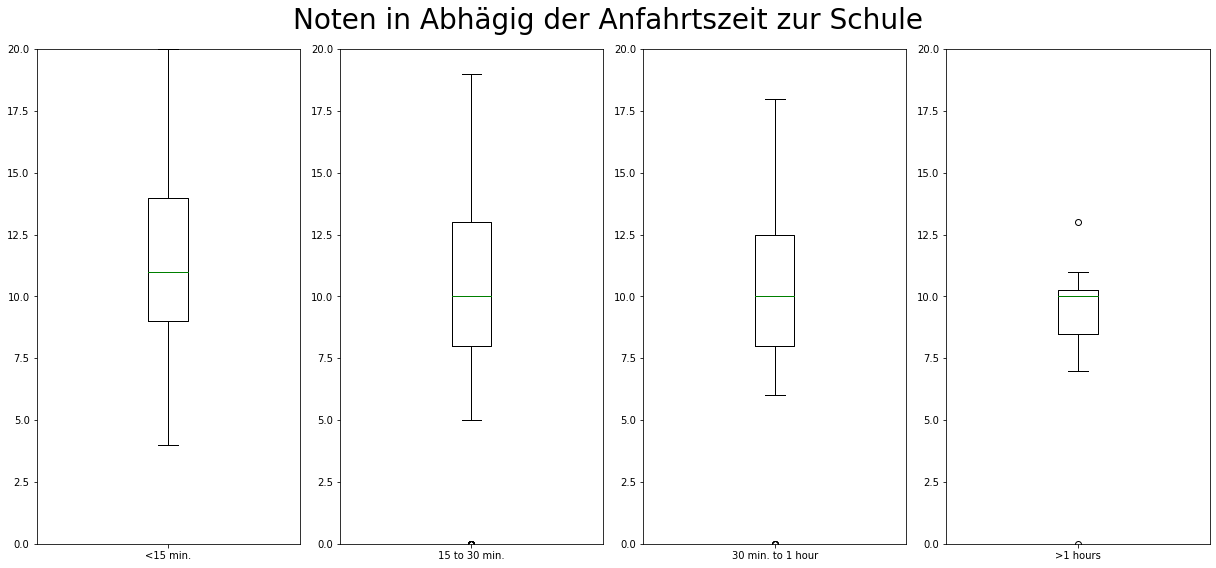

In [13]:
# Traveltime Plot
fig, ax = plt.subplots(nrows = 1, ncols= 4, figsize = (17,8))

fig.suptitle("Noten in Abhägig der Anfahrtszeit zur Schule", size = 28)

ax[0].boxplot(values1, labels=['<15 min.'],medianprops={'color': 'green'}, showfliers=False)
ax[1].boxplot(values2, labels=['15 to 30 min.'], medianprops={'color': 'green'})
ax[2].boxplot(values3, labels=['30 min. to 1 hour'], medianprops={'color': 'green'})
ax[3].boxplot(values4, labels=['>1 hours'], medianprops={'color': 'green'})

plt.setp(ax, ylim=(0,20))

fig.tight_layout()

In [14]:
# failure Values
temp0_df = df.loc[df.failures == 0]
temp1_df = df.loc[df.failures == 1]
temp2_df = df.loc[df.failures == 2]
temp3_df = df.loc[df.failures == 3]
temp4_df = df.loc[df.failures == 4]

values0 = list(temp0_df.G3)
values1 = list(temp1_df.G3)
values2 = list(temp2_df.G3)
values3 = list(temp3_df.G3)
values4 = list(temp4_df.G3)



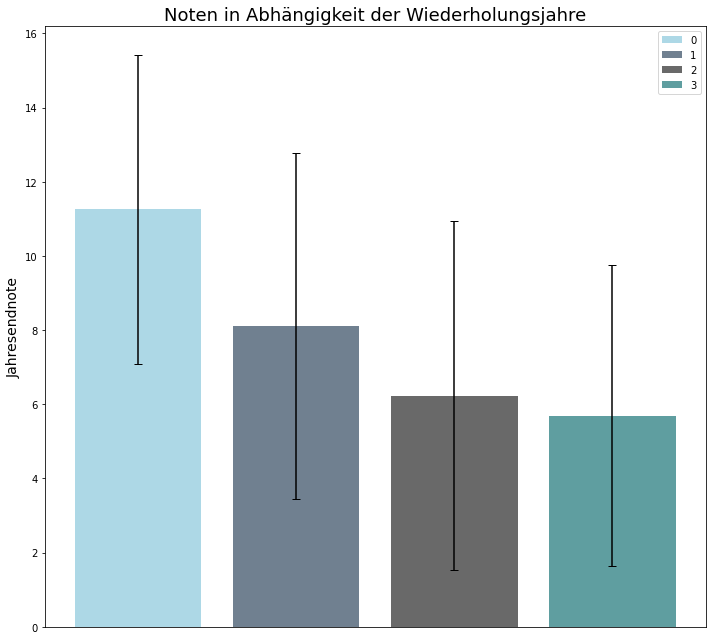

In [15]:
# failuers Graph
plt.figure(figsize=(10, 9))

index = np.arange(4)
plt.bar(0, np.mean(values0), color = 'lightblue', yerr = np.std(values0), capsize = 4, label = "0")
plt.bar(1, np.mean(values1), color = 'slategrey', yerr = np.std(values1), capsize = 4, label = "1")
plt.bar(2, np.mean(values2), color = 'dimgrey', yerr = np.std(values2), capsize = 4, label = "2")
plt.bar(3, np.mean(values3), color = 'cadetblue', yerr = np.std(values3), capsize = 4, label = "3")

plt.title("Noten in Abhängigkeit der Wiederholungsjahre", size = 18)
plt.ylabel("Jahresendnote", size = 14)
plt.legend()

ax=plt.gca()
ax.get_xaxis().set_visible(False)

plt.tight_layout()
plt.show()

In [21]:
# schoolsup Values
temp0_df = df.loc[df.schoolsup == "yes"]
temp1_df = df.loc[df.schoolsup == "no"]

values0 = list(temp0_df.G3)
values1 = list(temp1_df.G3)

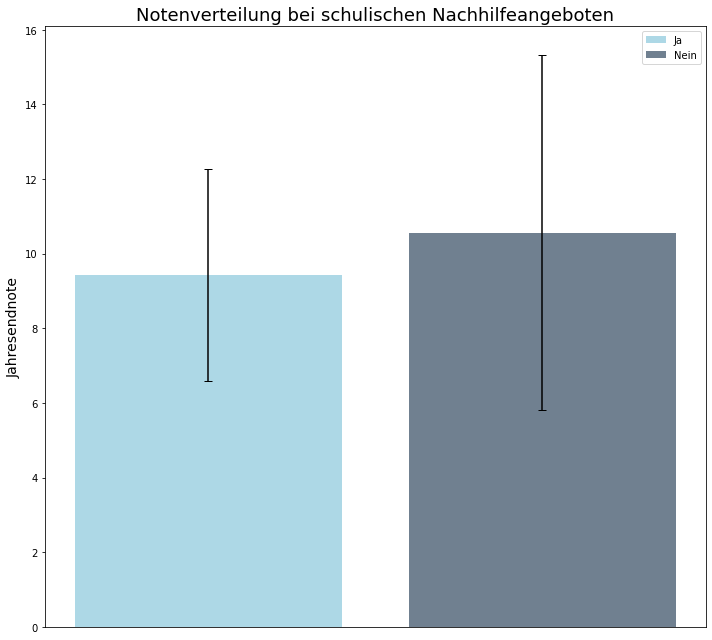

In [25]:
# schoolsup Graph
plt.figure(figsize=(10, 9))

index = np.arange(4)
plt.bar(0, np.mean(values0), color = 'lightblue', yerr = np.std(values0), capsize = 4, label = "Ja")
plt.bar(1, np.mean(values1), color = 'slategrey', yerr = np.std(values1), capsize = 4, label = "Nein")


plt.title("Notenverteilung bei schulischen Nachhilfeangeboten", size = 18)
plt.ylabel("Jahresendnote", size = 14)
plt.legend()

ax=plt.gca()
ax.get_xaxis().set_visible(False)

plt.tight_layout()

In [18]:
# paid Values
temp0_df = df.loc[df.paid == "yes"]
temp1_df = df.loc[df.paid == "no"]

values0 = list(temp0_df.G3)
values1 = list(temp1_df.G3)

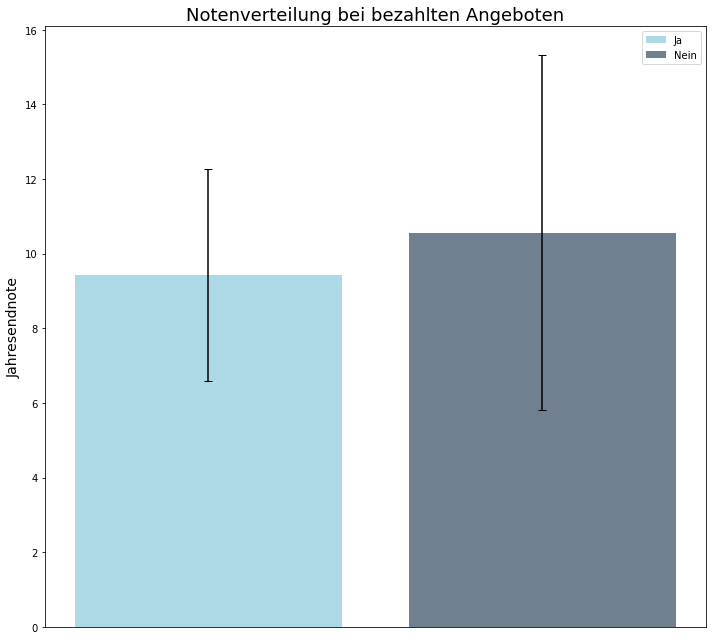

In [26]:
# paid Graph
plt.figure(figsize=(10, 9))

index = np.arange(4)
plt.bar(0, np.mean(values0), color = 'lightblue', yerr = np.std(values0), capsize = 4, label = "Ja")
plt.bar(1, np.mean(values1), color = 'slategrey', yerr = np.std(values1), capsize = 4, label = "Nein")


plt.title("Notenverteilung bei bezahlten Angeboten", size = 18)
plt.ylabel("Jahresendnote", size = 14)
plt.legend()

ax=plt.gca()
ax.get_xaxis().set_visible(False)

plt.tight_layout()